In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
print(os.getcwd())
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")


C:\Users\sheri


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [51]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [55]:
df.shape

(2443651, 9)

In [60]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [78]:
#1.Frequency Tables:
#Generate a frequency table for the product category.
frequency_table = df['category'].value_counts()
print(frequency_table)
#Which are the top 5 most listed product categories?
top5_categories=frequency_table.head(5)
print(f"Top five categories:{top5_categories}")

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64
Top five categories:category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


C:\Users\sheri\AppData\Local\Temp\ipykernel_20372\3387116438.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(y=top5_categories.index, x=top5_categories.values, palette="Set3")


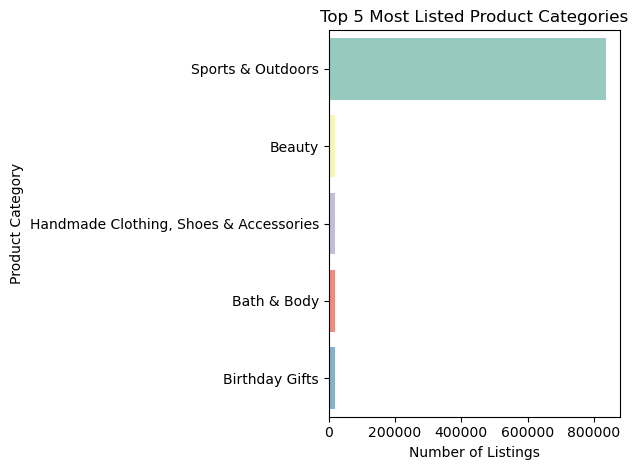

In [106]:
#2.Visualizations:

#Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
ax=sns.barplot(y=top5_categories.index, x=top5_categories.values, palette="Set3")
ax.set_title("Top 5 Most Listed Product Categories")
ax.set_xlabel("Number of Listings")
ax.set_ylabel("Product Category")
plt.tight_layout()
plt.show()

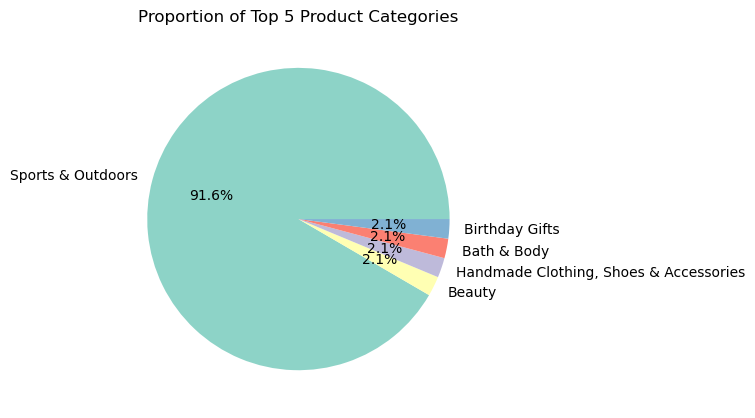

In [156]:
#For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?
top5_categories.plot.pie(
    autopct='%1.1f%%',
    startangle=0,
    colors=sns.color_palette("Set3"),
    ylabel='',
    title='Proportion of Top 5 Product Categories'
)
plt.tight_layout()
plt.show()

In [169]:
#Part 2: Delving into Product Pricing
#Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?
#1.Measures of Centrality:
#Calculate the mean, median, and mode for the price of products.
mean_price = df['price'].mean()
print(f"Mean of price of products:{mean_price}")
median_price = df['price'].median()
print(f"Median of price of products:{median_price}")
mode_price = df['price'].mode()[0]
print(f"Mode of price of products:{mode_price}")

#What's the average price point of products listed? How does this compare with the most common price point (mode)?
#The mean (£89.24) is much higher than the median (£19.09) and the mode (£9.99).
#This suggests the price distribution is right-skewed — there are many low-priced products but a smaller number of very expensive products pulling the average up.
#The mode (£9.99) indicates that the most common price point is quite low, possibly reflecting many budget or frequently discounted items.
#The median (£19.09) being closer to the mode than the mean confirms that more than half the products are priced below £20, but the tail of expensive products pushes the average up.
#Most products on Amazon UK are priced under £20, with £9.99 being the single most common price point. However, a significant number of higher-priced products increase the average price to about £89. This skew suggests a market with many affordable items and some costly outliers.

Mean of price of products:89.24380943923663
Median of price of products:19.09
Mode of price of products:9.99


In [174]:
#2.Measures of Dispersion:
#Determine the variance, standard deviation, range, and interquartile range for product price.
variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

print(f"Variance:{variance_price}")
print(f"Std_dev_price:{std_dev_price}")
print(f"Min_price:{min_price}")
print(f"Max_price:{max_price}")
print(f"Range_price:{range_price}")
print(f"Quantiles_price:{quantiles_price}")
#How varied are the product prices? Are there any indicators of a significant spread in prices?
#Huge Variance & Standard Deviation
  #The variance and standard deviation are very large compared to the mean (£89) and median (£19).
  #This means product prices vary widely across the dataset, with many prices far from the average.
#Wide Range
  #The price range is £0 to £100,000, which is enormous.
   #This huge range indicates extreme outliers or luxury products priced very high.
#Quantiles Show Price Concentration at Low End
  #75% of products are priced below about £46.
  #So,the majority of products are relatively affordable compared to the max price.

Variance:119445.48532256528
Std_dev_price:345.60886175352226
Min_price:0.0
Max_price:100000.0
Range_price:100000.0
Quantiles_price:0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64


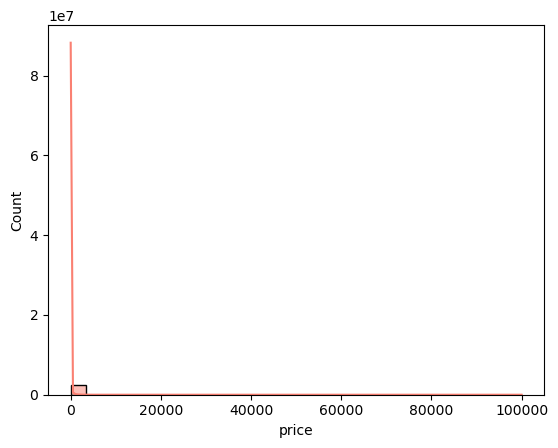

27.492977566280338
4241.616412866518


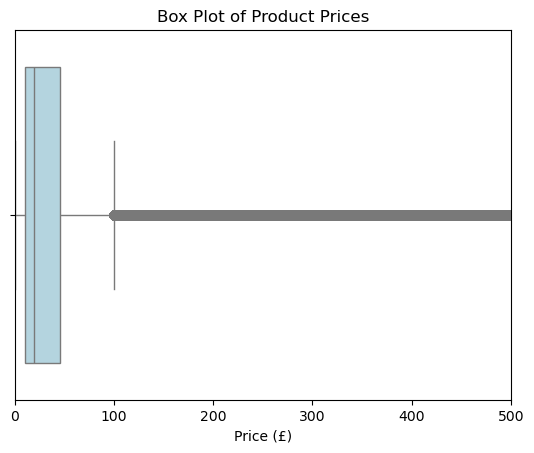

In [192]:
#3.Visualizations:
#Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, 
#think why this is, and explain how it could be solved..
sns.histplot(df['price'], kde=True, bins=30, color="salmon");
plt.show()
#The histogram is likely unreadable because of extreme outliers (like products priced near £100,000) that stretch the x-axis, compressing the view of the majority of products, which are under £50.
#Most products are low-priced (e.g., under £50), but a few extremely expensive items distort the scale, making the histogram look squished or flat on the left side.
skewness_price = df['price'].skew()
print(skewness_price)
kurtosis_price = df['price'].kurtosis()
print(kurtosis_price)
#Product prices on Amazon UK are highly right-skewed(skewness_price>0 and kurtosis_price>0) with extremely heavy tails, indicating that while most products are low-priced, a small number of luxury items are priced 
#orders of magnitude higher, creating many outliers in the dataset.
#Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

sns.boxplot(x=df['price'], color="lightblue")
plt.xlim(0, 500)  # Adjust this as needed
plt.title("Box Plot of Product Prices")
plt.xlabel("Price (£)")
plt.show()

In [202]:
#Part 3: Unpacking Product Ratings
#Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?
#1.Measures of Centrality:
#Calculate the mean, median, and mode for the rating of products.
mean_rating = df['stars'].mean()
print(f"Mean of rating of products:{mean_rating}")
median_rating = df['stars'].median()
print(f"Median of rating of products:{median_rating}")
mode_rating = df['stars'].mode()[0]
print(f"Mode of rating of products:{mode_rating}")
#How do customers generally rate products? Is there a common trend?
#Median=Mode=0->More than half of the product have a rating zero and zero is the most frequent value. In Amazon's context this doesnt mean that the product has bad rating,
#in fact most of the products are not rated by the customer.
#mean=2.15-> The average is slighly above two,which means that most of the products are not rated and the rated products pulling the average up.Its a skewed distribution.
#Most products listed on Amazon UK do not have any ratings yet.It suggests that relying on product rating data without filtering out unrated products may not give a meaningful
#view of customer satisfaction.

Mean of rating of products:2.152836472966065
Median of rating of products:0.0
Mode of rating of products:0.0


In [206]:
#2.Measures of Dispersion:
#Determine the variance, standard deviation, and interquartile range for product rating.
variance_rating = df['stars'].var()
std_dev_rating = df['stars'].std()
min_rating = df['stars'].min()
max_rating = df['stars'].max()
range_rating = max_rating - min_rating
quantiles_rating = df['stars'].quantile([0.25, 0.5, 0.75])

print(f"Variance:{variance_rating}")
print(f"Std_dev_rating:{std_dev_rating}")
print(f"Min_rating:{min_rating}")
print(f"Max_rating:{max_rating}")
print(f"Range_rating:{range_rating}")
print(f"Quantiles_rating:{quantiles_rating}")
#Are the ratings consistent, or is there a wide variation in customer feedback?
#The range is 5.0, which is the entire scale from 0 to 5.
#A standard deviation of 2.19 is high, given the scale only goes up to 5 — this suggests ratings are highly spread out.
#Both Q1 and Median = 0: At least 50% of products have no ratings.
#Q3 = 4.4: That means only the top 25% of products have strong ratings (greater than 4.4)
#Variance = 4.82:On a 0–5 scale, this is relatively very high, again confirming inconsistent ratings.
#Amazon UK has inconsistent ratings of products with a large number of products are not rated at all.Only the top quartile of rated products receive strong ratings and the rest are unrated or varied ratings.

Variance:4.81743402976196
Std_dev_rating:2.1948653785054697
Min_rating:0.0
Max_rating:5.0
Range_rating:5.0
Quantiles_rating:0.25    0.0
0.50    0.0
0.75    4.4
Name: stars, dtype: float64


In [210]:
#3.Shape of the Distribution:
#Calculate the skewness and kurtosis for the rating column.
skewness_rating= df['stars'].skew()
print(skewness_rating)
kurtosis_rating = df['stars'].kurtosis()
print(kurtosis_rating)
#Are the ratings normally distributed, or do they lean towards higher or lower values?
#Skewness nearly zero means distribution is approximately symmetrical.But,we have already found out 50% of the products have rating zero or not rated.So,its numerically symmetrical but,not practically symmetrical.
#Negative kurtosis indicates a flat distribution with light tails.But,it’s skewed by the massive spike at 0 and relatively few ratings.

0.08120735761080985
-1.9260061280432985


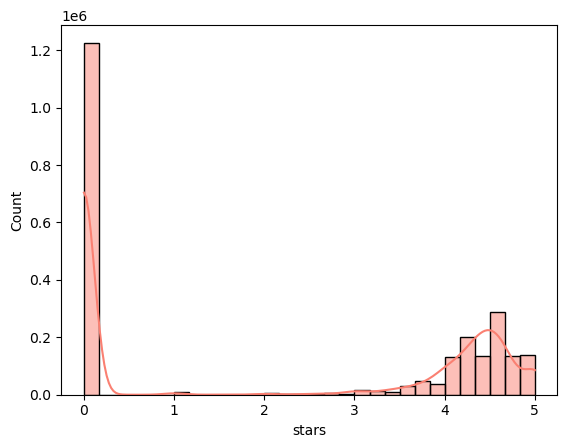

In [214]:
#4.Visualizations:
#Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?
sns.histplot(df['stars'], kde=True, bins=30, color="salmon");
plt.show()
#A huge spike at 0.A long flat tail across ratings from 1 to 5
#A visible peak likely around 4.0 to 5.0.The most common rating among rated products will likely be 4.5 or 5